# El problema de Monty Hall

El [**problema de Monty Hall**](https://es.wikipedia.org/wiki/Problema_de_Monty_Hall) es un problema matemático de probabilidad basado en el concurso televisivo estadounidense _Let's Make a Deal_ (Hagamos un trato). El problema fue bautizado con el nombre del presentador de dicho concurso: Monty Hall.

## La premisa

Se ofrece un concurso cuya mecánica es la siguiente:

- Al concursante se le ofrece la posibilidad de escoger una entre tres puertas. Tras una
  de ellas se encuentra un ~~piso en Toremolinos~~ tesoro, y tras las otras dos, una cabra. 
  El concursante gana el premio que se oculta detrás de la puerta que escoja.
 
- Después de que el concursante escoja una puerta, el presentador abre una de las otras
  dos puertas, mostrando una cabra. Siempre puede hacerlo ya que incluso si el
  concursante ha escogido una cabra, queda otra entre las puertas que ha descartado
  y el presentador sabe siempre lo que hay detrás de cada puerta.

- Entonces, ofrece al concursante la posibilidad de cambiar su elección inicial
  y escoger la otra puerta que descartó originalmente, que continúa cerrada.

La pregunta es: **¿debe hacerlo o no?**

Vamos a demostrarlo por el método de la fuerza bruta. Hagamos miles de simulaciones con un jugador conservador (que se mantienen siempre en su primera elección) y con un jugador innovador (siempre cambia de puerta).

In [1]:
import random
import numpy as np
import seaborn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Repesentaremos las puertas con un conjunto

puertas = set('ABC')
print(puertas)

{'B', 'A', 'C'}


In [3]:
# ¿Dónde está el coche? Elegimos una puerta al azar
tesoro = random.choice(list(puertas))
print('El tesoro está en la puerta {}'.format(tesoro))

El tesoro está en la puerta B


In [4]:
# El jugador elige su puerta. Puede elegir la puerta donde está el tesoro, o no

eleccion_jugador = random.choice(list(puertas))
print('El jugador elige la puerta {}'.format(eleccion_jugador))

El jugador elige la puerta A


Ahora mismo, las posibilidades de acertar la puerta son de 1 contra 3, es decir, que la probabilidad de llevarse el coche a casa es $\frac 1 3$. Vamos a realizar vaarios intentos a ver si nuestra intuición es correcta.

In [5]:
Intentos = 10
tesoros = np.array([random.choice(list(puertas)) for _ in range(Intentos)])
elecciones = np.array([random.choice(list(puertas)) for _ in range(Intentos)])
aciertos = tesoros == elecciones  # wtf!

# ¿Quá es aciertos?
aciertos, tesoros, elecciones

(array([False, False, False, False,  True, False, False, False, False, False], dtype=bool),
 array(['B', 'C', 'C', 'B', 'A', 'C', 'B', 'C', 'B', 'C'],
       dtype='<U1'),
 array(['C', 'B', 'A', 'C', 'A', 'B', 'A', 'A', 'C', 'B'],
       dtype='<U1'))

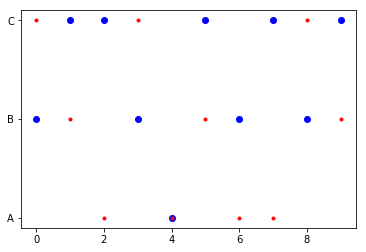

In [6]:
plt.plot(tesoros, 'ob')
plt.plot(elecciones, '.r');

En aqellos casos en los que coincide el círculo azul con el punto rojo, el jugador habrá acertado a la primera

In [7]:
total_aciertos = np.sum(aciertos)
print('Ejecutadas {} simulaciones, el jugador ganó {} ({:2f} %)'.format(
    Intentos,
    total_aciertos,
    (total_aciertos * 100. / Intentos),
    ))

Ejecutadas 10 simulaciones, el jugador ganó 1 (10.000000 %)


Continuemos ahora con el resto del concurso. El presentador, que sabe lo que hay detrás de cada puerta, abre una con cabra. En la práctica, eso elimina la puerta del juego: ya no puede ser elegida por el concursante.

In [8]:
opciones = puertas.copy() # De entrada puedo abrir cualquier puerta ...
opciones.discard(tesoro)  # ...pero el presentador no es tonto, no abre la del tesoro
opciones.discard(eleccion_jugador)  # ... y tampoco puede elegir la del jugador
assert len(opciones) == 1 or len(opciones) == 2 # ... pero siempre podre elegir alguna puerta
puerta_a_abrir = random.choice(list(opciones))  # ... elige una al azar
puertas.discard(puerta_a_abrir)  # ... y la abre (sacandola del juego)
assert len(puertas) == 2  # ... quedan dos puertas en juego
print('El presentador abre la puerta {}: Hay una cabra'.format(puerta_a_abrir))

El presentador abre la puerta C: Hay una cabra


In [9]:
tesoro, eleccion_jugador, puertas

('B', 'A', {'A', 'B'})

In [10]:
# Que hacemos si el jugador es conservador
pass  # nada. Nos quedamos la primera elección

In [11]:
# Que hacemos si el jugador es innovador
# Cambiamos de puerta
puertas.discard(eleccion_jugador) # ... solo queda una
eleccion_jugador = puertas.pop()  # asi que me cambio
print('El jugador cambia a la puerta {}'. format(eleccion_jugador))

El jugador cambia a la puerta B


In [12]:
if eleccion_jugador == tesoro:
    print('El jugador gana')
else:
    print('El jugador pierde')

El jugador gana


## Función de simulación del juego

Vamos a meter todo esto en una función que simila una sesión de juego. La funcion devuelve `True` si el jugador gana o `False` en caso contrario. Acepta un parámetro, conservador, por defecto `True`, que determina el comportamiento del jugador: si es conservador, no cambia nunca de puerta, en caso contrario, cambia siempre:


In [13]:
def simula_sesion_juego(conservador=True):
    puertas = set('ABC')  # tenemos 3 puertas
    tesoro = random.choice(list(puertas))
    eleccion_jugador = random.choice(list(puertas))
    # descartamos una puerta con cabra
    opciones = puertas.copy() # De entrada puedo abrir cualquier puerta ...
    opciones.discard(tesoro)  # ...pero el presentador no es tonto, no abre la del tesoro
    opciones.discard(eleccion_jugador)  # ... y tampoco puede elegir la del jugador
    assert len(opciones) == 1 or len(opciones) == 2 # ... pero siempre podre elegir alguna puerta
    puerta_a_abrir = random.choice(list(opciones))  # ... elige una al azar
    puertas.discard(puerta_a_abrir)  # ... y la abre (sacandola del juego)
    assert len(puertas) == 2  # ... quedan dos puertas en juego
    if conservador:
        pass  # Nah, me quedo con la que elegi al principio
    else:
        puertas.discard(eleccion_jugador) # ... solo queda una, aparte de la mia
        eleccion_jugador = puertas.pop()  # asi que me cambio
    return tesoro == eleccion_jugador

Ejecutemos varias simulaciones, a ver que estrategia es la ganadora a largo plazo

In [14]:
num_veces_gana_conservador = 0
num_veces_gana_innovador = 0
num_simulaciones = 10000
for i in range(num_simulaciones):
    if simula_sesion_juego():
        num_veces_gana_conservador += 1
    else:
        num_veces_gana_innovador += 1

print('''Realizadas {} simulaciones:
- la estrategia conservadora gana {} veces
- la estrategia innovadora gana {} veces'''.format(
    num_simulaciones,
    num_veces_gana_conservador,
    num_veces_gana_innovador,
))

Realizadas 10000 simulaciones:
- la estrategia conservadora gana 3367 veces
- la estrategia innovadora gana 6633 veces


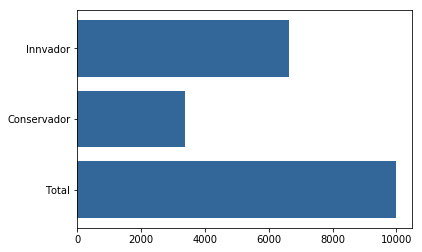

In [15]:
data = [num_simulaciones, num_veces_gana_conservador, num_veces_gana_innovador]
pos = list(range(len(data)))
plt.barh(pos, data, color='#336699')
plt.yticks(pos, ('Total', 'Conservador', 'Innvador'));

# Extra bonus

Vamos a ver como, a medida que realizamos más simulaciones, la proporción de veces que gana el innovador se aproxima a $\frac 2 3$, y la del conservador a $\frac 1 3$.

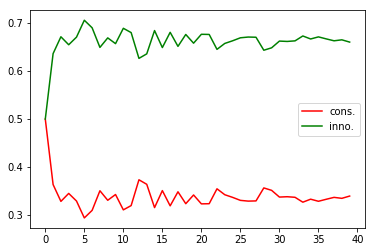

In [16]:
sec_cons = []
sec_inno = []
for num_simulaciones in range(10, 4000, 100):
    arr = np.array([simula_sesion_juego() for _ in range(num_simulaciones)])
    num_veces_gana_conservador = np.sum(arr)
    sec_cons.append(num_veces_gana_conservador / num_simulaciones)
    num_veces_gana_innovador = num_simulaciones - num_veces_gana_conservador
    sec_inno.append(num_veces_gana_innovador / num_simulaciones)
plt.plot(sec_cons, label='cons.', color='red')
plt.plot(sec_inno, label='inno.', color="green")

plt.legend();

## Extra Bonus 2

In [17]:
from IPython.display import HTML

HTML('''
<iframe width="560" height="315"
src="https://www.youtube.com/embed/ZpgIaAOeIAY?rel=0" frameborder="0" allowfullscreen></iframe>
''')
